# Velocity Packet Tracker Visualisation

A file to generate a SDEC plot. And to a second plot showing the abundance of each element as a function of velocity

## Atomic Data

Using the [kurucz_cd23_chianti_H_He.h5](https://dev.azure.com/tardis-sn/TARDIS/_apis/git/repositories/tardis-refdata/items?path=atom_data/kurucz_cd23_chianti_H_He.h5&resolveLfs=true) dataset, as recommended

In [1]:
from tardis.io.atom_data.util import download_atom_data

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

In [2]:
download_atom_data('kurucz_cd23_chianti_H_He')

## Example Configuration File

The configuration file [tardis_example.yml](https://github.com/tardis-sn/tardis/tree/master/docs/tardis_example.yml) is used throughout this

In [3]:
!wget -q -nc https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/tardis_example.yml

In [4]:
!cat tardis_example.yml

# Example YAML configuration for TARDIS
tardis_config_version: v1.0

supernova:
  luminosity_requested: 9.44 log_lsun
  time_explosion: 13 day

atom_data: kurucz_cd23_chianti_H_He.h5

model:
  structure:
    type: specific
    velocity:
      start: 1.1e4 km/s
      stop: 20000 km/s
      num: 20
    density:
      type: branch85_w7

  abundances:
    type: uniform
    O: 0.19
    Mg: 0.03
    Si: 0.52
    S: 0.19
    Ar: 0.04
    Ca: 0.03

plasma:
  disable_electron_scattering: no
  ionization: lte
  excitation: lte
  radiative_rates_type: dilute-blackbody
  line_interaction_type: macroatom

montecarlo:
  seed: 23111963
  no_of_packets: 4.0e+4
  iterations: 20
  nthreads: 1

  last_no_of_packets: 1.e+5
  no_of_virtual_packets: 10

  convergence_strategy:
    type: damped
    damping_constant: 1.0
    threshold: 0.05
    fraction: 0.8
    hold_iterations: 3
    t_inner:
      damping_constant: 0.5

spectrum:
  start: 500 angstrom
  stop: 20000 angstrom
  num: 10000


## Running the Simulation

Importing the `run_tardis` function and creating the `sim` object

In [5]:
from tardis import run_tardis

In [6]:
sim = run_tardis("tardis_example.yml", 
                 virtual_packet_logging=True,
                 show_convergence_plots=True,
                 export_convergence_plots=True,
                 log_level="INFO") 

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:95)
[tardis.io.atom_data.util][INFO   ]  
	
	Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path.
	Exists in TARDIS Data repo /home/soumya624/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:33)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:249)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:253)
[py.warnings         ][WARNING]  
	/mnt/c/Users/ASUS/Downloads/Tardis/Forked Tardis/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)
[py.warnings         ][WARNING]  
	/mnt/c/Users/ASUS/Downloads/Tardis/Forked Tardis/tardis/tardis/plasma

TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 7.942e+42 erg / s
	Luminosity absorbed  = 2.659e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,9.93e+03,1.01e+04,0.4,0.507
5,9.85e+03,1.02e+04,0.211,0.197
10,9.78e+03,1.01e+04,0.143,0.117
15,9.71e+03,9.87e+03,0.105,0.0869


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 10703.212 K
 (base.py:554)
[py.warnings         ][WARNING]  
	/mnt/c/Users/ASUS/Downloads/Tardis/Forked Tardis/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)


    'data': [{'type': 'scatter', 'uid': '9e28595f-76f5-4302-a019-5319112153fc', …

[tardis.simulation.base][INFO   ]  
	
	Starting iteration 2 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.071e+43 erg / s
	Luminosity absorbed  = 3.576e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.01e+04,1.08e+04,0.507,0.525
5,1.02e+04,1.1e+04,0.197,0.203
10,1.01e+04,1.08e+04,0.117,0.125
15,9.87e+03,1.05e+04,0.0869,0.0933


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10703.212 K
	Expected t_inner for next iteration = 10673.712 K
 (base.py:554)
[py.warnings         ][WARNING]  
	/mnt/c/Users/ASUS/Downloads/Tardis/Forked Tardis/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in true_divide

 (warnings.py:109)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 3 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.074e+43 erg / s
	Luminosity absorbed  = 3.391e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.08e+04,1.1e+04,0.525,0.483
5,1.1e+04,1.12e+04,0.203,0.189
10,1.08e+04,1.1e+04,0.125,0.118
15,1.05e+04,1.06e+04,0.0933,0.0895


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10673.712 K
	Expected t_inner for next iteration = 10635.953 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 4 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.058e+43 erg / s
	Luminosity absorbed  = 3.352e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.483,0.469
5,1.12e+04,1.12e+04,0.189,0.182
10,1.1e+04,1.1e+04,0.118,0.113
15,1.06e+04,1.07e+04,0.0895,0.0861


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10635.953 K
	Expected t_inner for next iteration = 10638.407 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 5 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.055e+43 erg / s
	Luminosity absorbed  = 3.399e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.469,0.479
5,1.12e+04,1.13e+04,0.182,0.178
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0861,0.0839


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.407 K
	Expected t_inner for next iteration = 10650.202 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 6 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.398e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.479,0.47
5,1.13e+04,1.12e+04,0.178,0.185
10,1.1e+04,1.11e+04,0.113,0.112
15,1.07e+04,1.07e+04,0.0839,0.0856


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10650.202 K
	Expected t_inner for next iteration = 10645.955 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 7 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.382e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.47,0.47
5,1.12e+04,1.13e+04,0.185,0.178
10,1.11e+04,1.11e+04,0.112,0.112
15,1.07e+04,1.07e+04,0.0856,0.086


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10645.955 K
	Expected t_inner for next iteration = 10642.050 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 8 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.350e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.47,0.472
5,1.13e+04,1.14e+04,0.178,0.175
10,1.11e+04,1.11e+04,0.112,0.111
15,1.07e+04,1.07e+04,0.086,0.084


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10642.050 K
	Expected t_inner for next iteration = 10636.106 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 9 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.052e+43 erg / s
	Luminosity absorbed  = 3.411e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 5/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.472,0.469
5,1.14e+04,1.15e+04,0.175,0.17
10,1.11e+04,1.11e+04,0.111,0.109
15,1.07e+04,1.08e+04,0.084,0.0822


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.106 K
	Expected t_inner for next iteration = 10654.313 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 10 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.070e+43 erg / s
	Luminosity absorbed  = 3.335e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.475
5,1.15e+04,1.14e+04,0.17,0.177
10,1.11e+04,1.11e+04,0.109,0.112
15,1.08e+04,1.06e+04,0.0822,0.0878


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10654.313 K
	Expected t_inner for next iteration = 10628.190 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 11 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.363e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.475,0.472
5,1.14e+04,1.12e+04,0.177,0.184
10,1.11e+04,1.1e+04,0.112,0.114
15,1.06e+04,1.06e+04,0.0878,0.0859


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10628.190 K
	Expected t_inner for next iteration = 10644.054 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 12 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.420e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.467
5,1.12e+04,1.13e+04,0.184,0.176
10,1.1e+04,1.11e+04,0.114,0.11
15,1.06e+04,1.08e+04,0.0859,0.0821


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10644.054 K
	Expected t_inner for next iteration = 10653.543 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 13 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.406e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.467,0.466
5,1.13e+04,1.13e+04,0.176,0.18
10,1.11e+04,1.11e+04,0.11,0.111
15,1.08e+04,1.08e+04,0.0821,0.0841


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10653.543 K
	Expected t_inner for next iteration = 10647.277 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 14 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.063e+43 erg / s
	Luminosity absorbed  = 3.369e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.466,0.469
5,1.13e+04,1.13e+04,0.18,0.182
10,1.11e+04,1.1e+04,0.111,0.113
15,1.08e+04,1.07e+04,0.0841,0.0854


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10647.277 K
	Expected t_inner for next iteration = 10638.875 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 15 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.417e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.484
5,1.13e+04,1.13e+04,0.182,0.181
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0854,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.875 K
	Expected t_inner for next iteration = 10655.125 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 16 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.059e+43 erg / s
	Luminosity absorbed  = 3.445e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.484,0.472
5,1.13e+04,1.13e+04,0.181,0.177
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.06e+04,0.0858,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.125 K
	Expected t_inner for next iteration = 10655.561 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 17 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.067e+43 erg / s
	Luminosity absorbed  = 3.372e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.468
5,1.13e+04,1.14e+04,0.177,0.175
10,1.1e+04,1.11e+04,0.113,0.11
15,1.06e+04,1.08e+04,0.0858,0.0816


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.561 K
	Expected t_inner for next iteration = 10636.536 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 18 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.057e+43 erg / s
	Luminosity absorbed  = 3.365e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.468,0.464
5,1.14e+04,1.13e+04,0.175,0.177
10,1.11e+04,1.1e+04,0.11,0.113
15,1.08e+04,1.07e+04,0.0816,0.0848


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.536 K
	Expected t_inner for next iteration = 10641.692 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 19 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.405e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)
[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)
[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.464,0.466
5,1.13e+04,1.13e+04,0.177,0.177
10,1.1e+04,1.11e+04,0.113,0.111
15,1.07e+04,1.07e+04,0.0848,0.0853


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10641.692 K
	Expected t_inner for next iteration = 10650.463 K
 (base.py:554)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 20 of 20 (base.py:385)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.401e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 20 iterations 
	Simulation took 39.50 s
 (base.py:480)


## Generating SDEC Plot

Finally, generating the SDEC plot with `matplotlib`

In [7]:
from tardis.visualization import SDECPlotter

In [8]:
import matplotlib.pyplot as plt

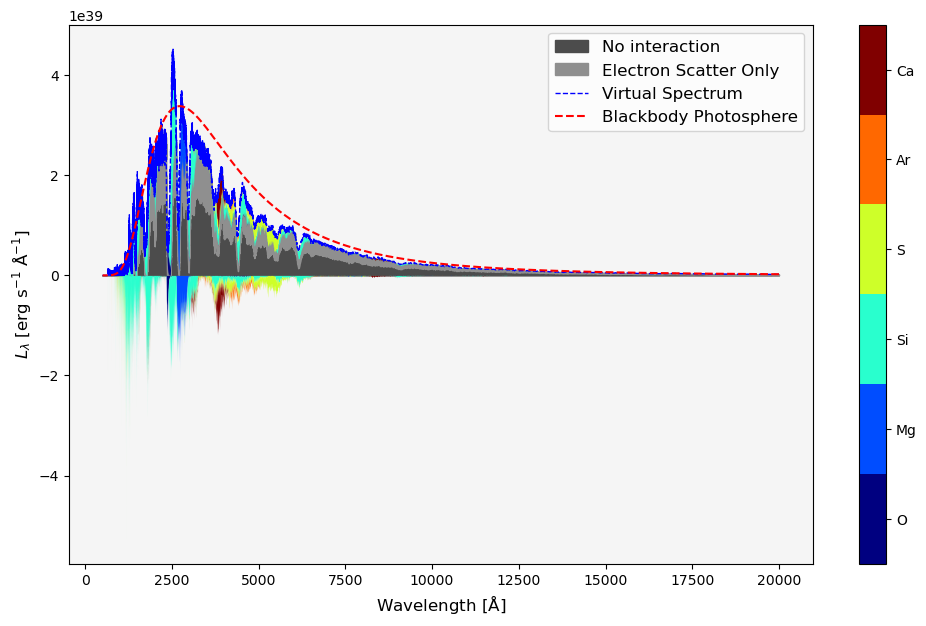

In [9]:
# Create plot
plot = SDECPlotter.from_simulation(sim)
fig = plot.generate_plot_mpl()

# Customize plot
fig.set_facecolor('#f5f5f5')  # Set background color

## Visualising Abundance

Relating abundance of the elements against velocity

In [10]:
import matplotlib.pyplot as plt

### Define Variables

In [11]:
# Converting velocity to km/s
vel_of_shell = (sim.model.v_inner / 1000).to('km/s')

abundance = sim.plasma.abundance

# Converting density to g/cm^3
density_of_shell = (sim.model.homologous_density.density_0 / 1000**3).to('g/cm^3')

### Plot Fractional Abudances

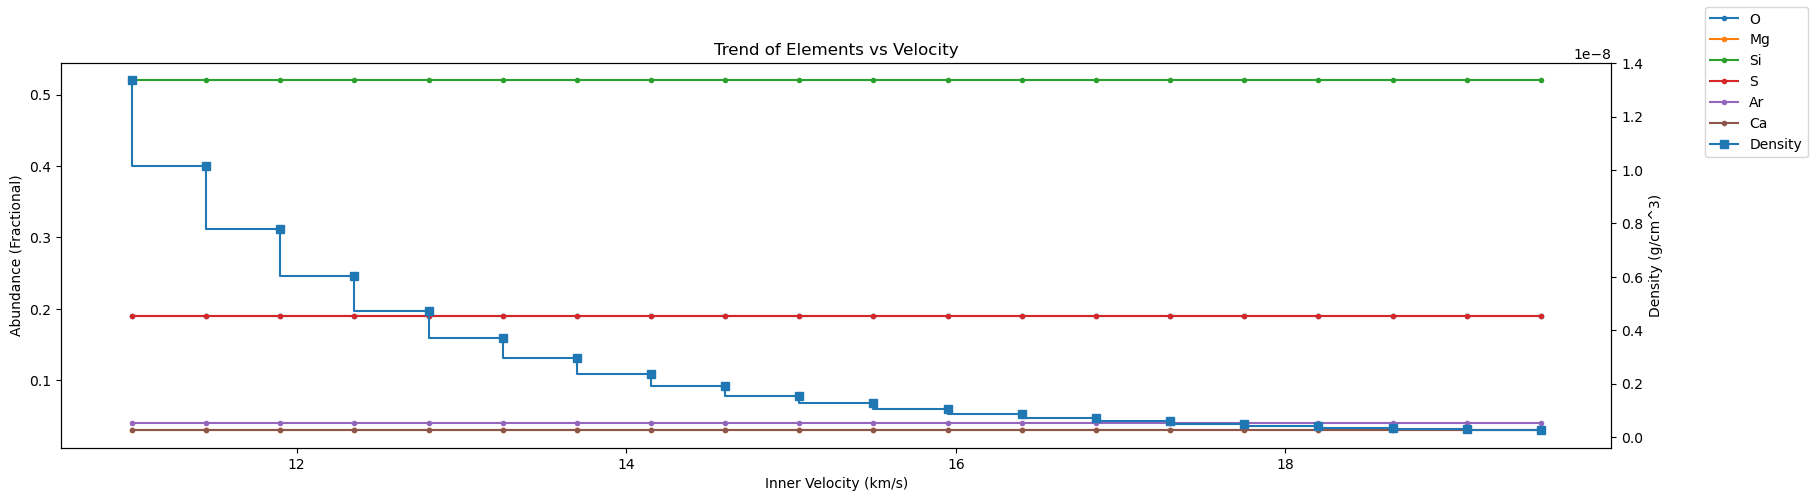

In [12]:
fig, abundance_axis = plt.subplots(figsize=(20, 5))
atom_data = sim.plasma.atomic_data.atom_data

for atomic_number in sim.plasma.selected_atoms:
    atom_abundance = abundance.loc[atomic_number]
    abundance_axis.step(vel_of_shell, atom_abundance, marker='.', label=atom_data.symbol.loc[atomic_number])

abundance_axis.set(title='Trend of Elements vs Velocity', xlabel='Inner Velocity (km/s)', ylabel='Abundance (Fractional)')

density_axis = abundance_axis.twinx()
density_axis.step(vel_of_shell, density_of_shell[1:], marker='s', label='Density')
density_axis.set(ylabel='Density (g/cm^3)')

_ = fig.legend()

### Density vs Velocity for Different Elements

This plot shows the fractional abundance of different elements as a function of inner velocity, with the density of the shell overlaid as a black dashed line on the right axis. Each element is represented by a different colored line, with a legend indicating the symbol for each element

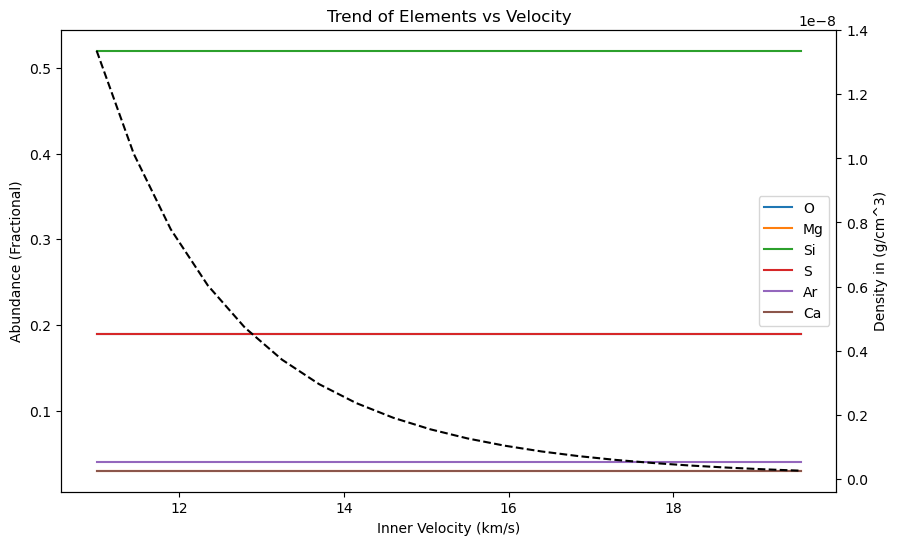

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

for atomic_number in sim.plasma.selected_atoms:
    atom_abundance = abundance.loc[atomic_number]
    ax.plot(vel_of_shell, atom_abundance, label=atom_data.symbol.loc[atomic_number])
    
ax.set(xlabel='Inner Velocity (km/s)', ylabel='Abundance (Fractional)', title='Trend of Elements vs Velocity')
ax.legend()

ax2 = ax.twinx()
ax2.plot(vel_of_shell, density_of_shell[1:], 'k--', label='Density')
ax2.set(ylabel='Density in (g/cm^3)')

plt.show()


### Bubble Chart

This plot shows the density of each element at the outermost shell as a function of inner velocity using a bubble chart. Each element is represented by a circle with a size proportional to its fractional abundance at the outermost shell, and a color indicating its atomic symbol. The size and position of the outermost shell circle is fixed, while the position of the element circles varies with velocity. This plot is useful for comparing the densities of different elements at the outermost shell across a range of velocities

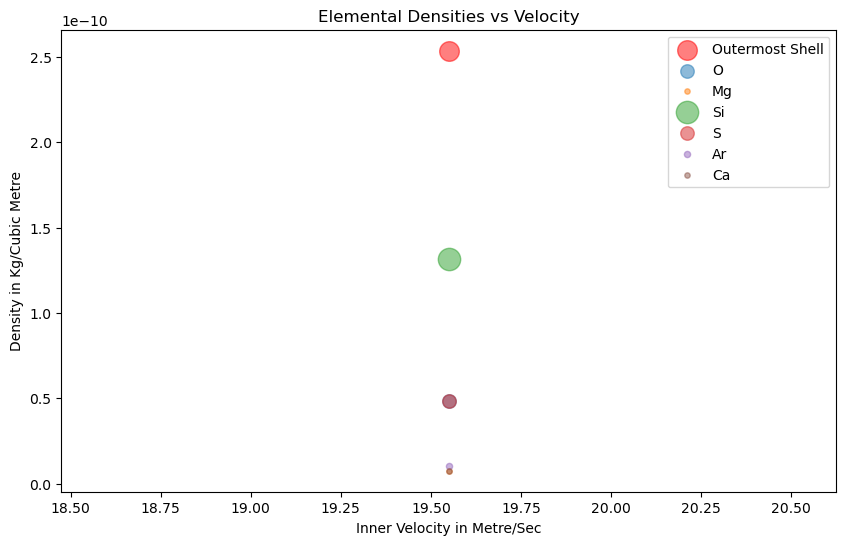

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

abundance_data = []
density_data = []

for atomic_number in sim.plasma.selected_atoms:
    atom_abundance = abundance.loc[atomic_number].iloc[-1]
    atom_density = atom_abundance * density_of_shell[-1]
    abundance_data.append(atom_abundance)
    density_data.append(atom_density)

ax.scatter(vel_of_shell[-1], density_of_shell[-1], s=200, c='r', alpha=0.5, label='Outermost Shell')

for i, atomic_number in enumerate(sim.plasma.selected_atoms):
    ax.scatter(vel_of_shell[-1], density_data[i], s=500*abundance_data[i], alpha=0.5, label=atom_data.symbol.loc[atomic_number])

ax.set(xlabel='Inner Velocity (km/s)', ylabel='Density (g/cm^3)', title='Elemental Densities vs Velocity')
ax.legend()

plt.show()
